In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df=pd.read_csv("/content/drive/MyDrive/faults.csv")

In [4]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [6]:
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

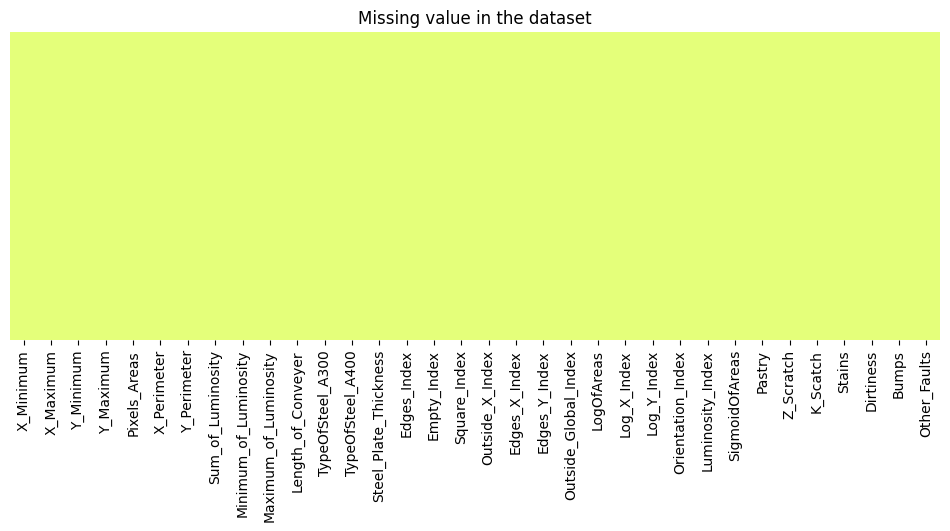

In [7]:
#check missing values
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='Wistia',yticklabels=False)
plt.title('Missing value in the dataset');

In [8]:
df.iloc[:,27:34]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1936,0,0,0,0,0,0,1
1937,0,0,0,0,0,0,1
1938,0,0,0,0,0,0,1
1939,0,0,0,0,0,0,1


(1941, 27)


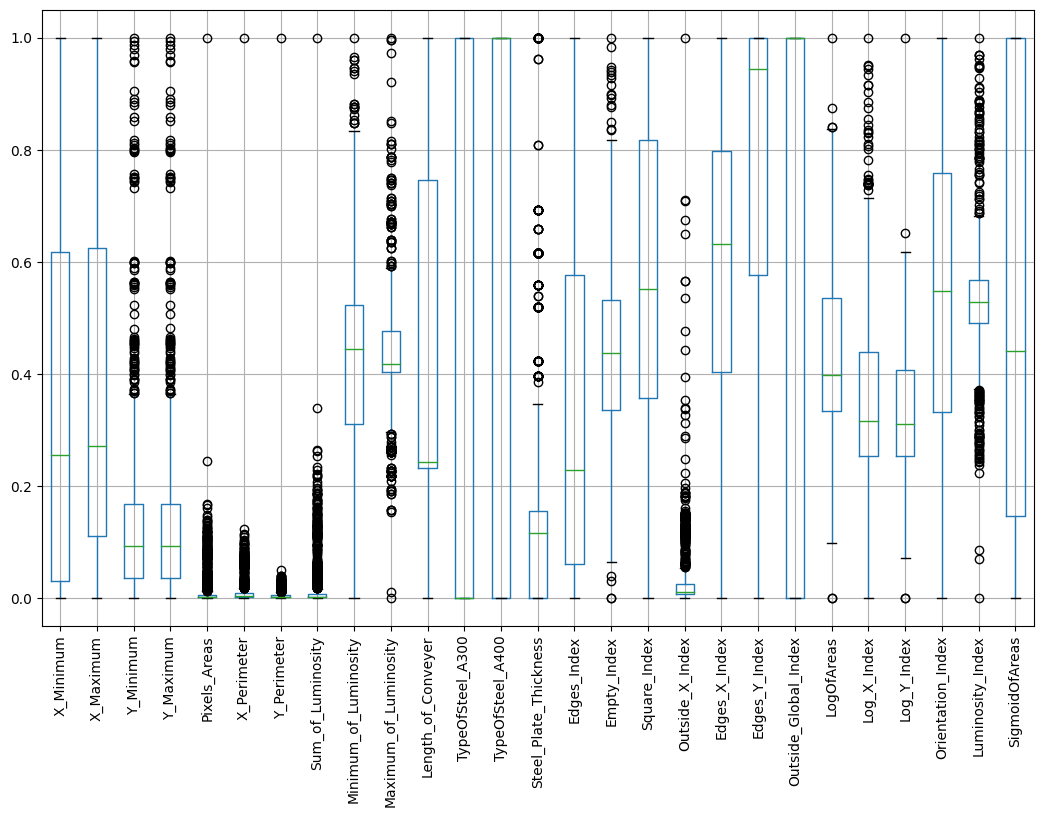

In [9]:
y=df.iloc[:,27:34];
X=df.iloc[:,0:27];
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range =(0,1))

X_std = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
print(X_std.shape)
X_std.boxplot(figsize = (12.8,8), rot = 90)
plt.boxplot
plt.show()

In [10]:
targets = df.iloc[:, 27:]
df.drop(targets.columns, axis=1, inplace=True) # this will drop the all the defects column
df['Target'] = targets.idxmax(1) #this will add a 'Target' column to our dataset describing which record has a particular defect.
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


<Axes: ylabel='Target'>

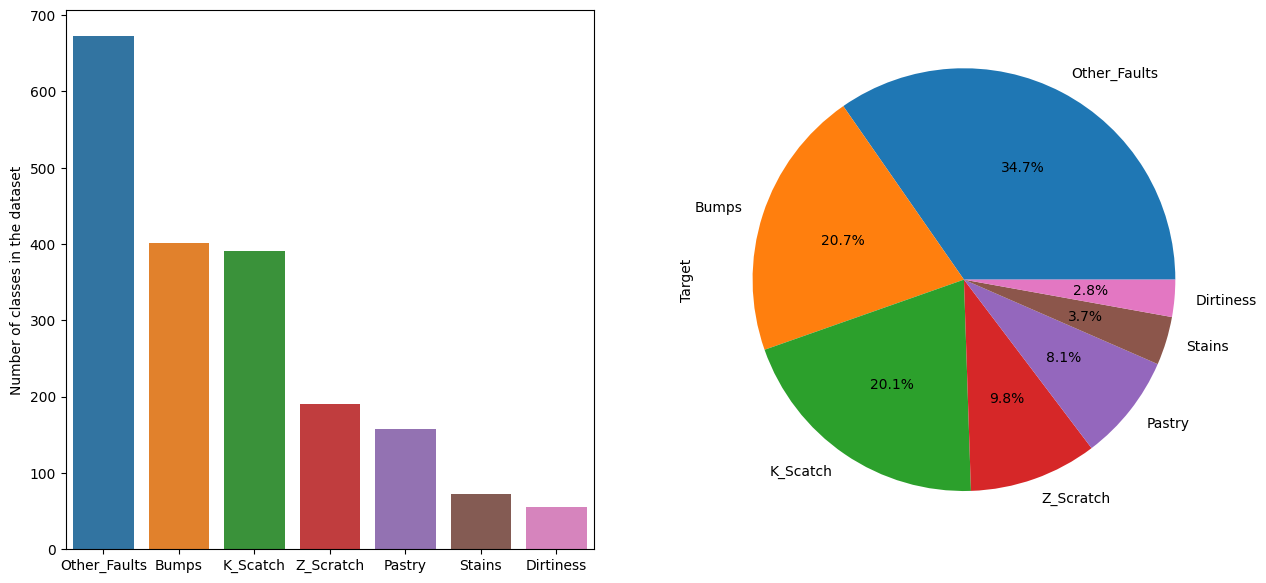

In [11]:
target_counts= df['Target'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(15,7))
target_counts_barplot = sns.barplot(x = target_counts.index,y = target_counts.values, ax = ax[0])
target_counts_barplot.set_ylabel('Number of classes in the dataset')

colors = ['#8d99ae','#ffe066', '#f77f00','#348aa7','#bce784','#ffcc99',  '#f25f5c']
target_counts.plot.pie(autopct="%1.1f%%", ax=ax[1])

<ipython-input-12-545352e470ef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='hsv')


<Axes: >

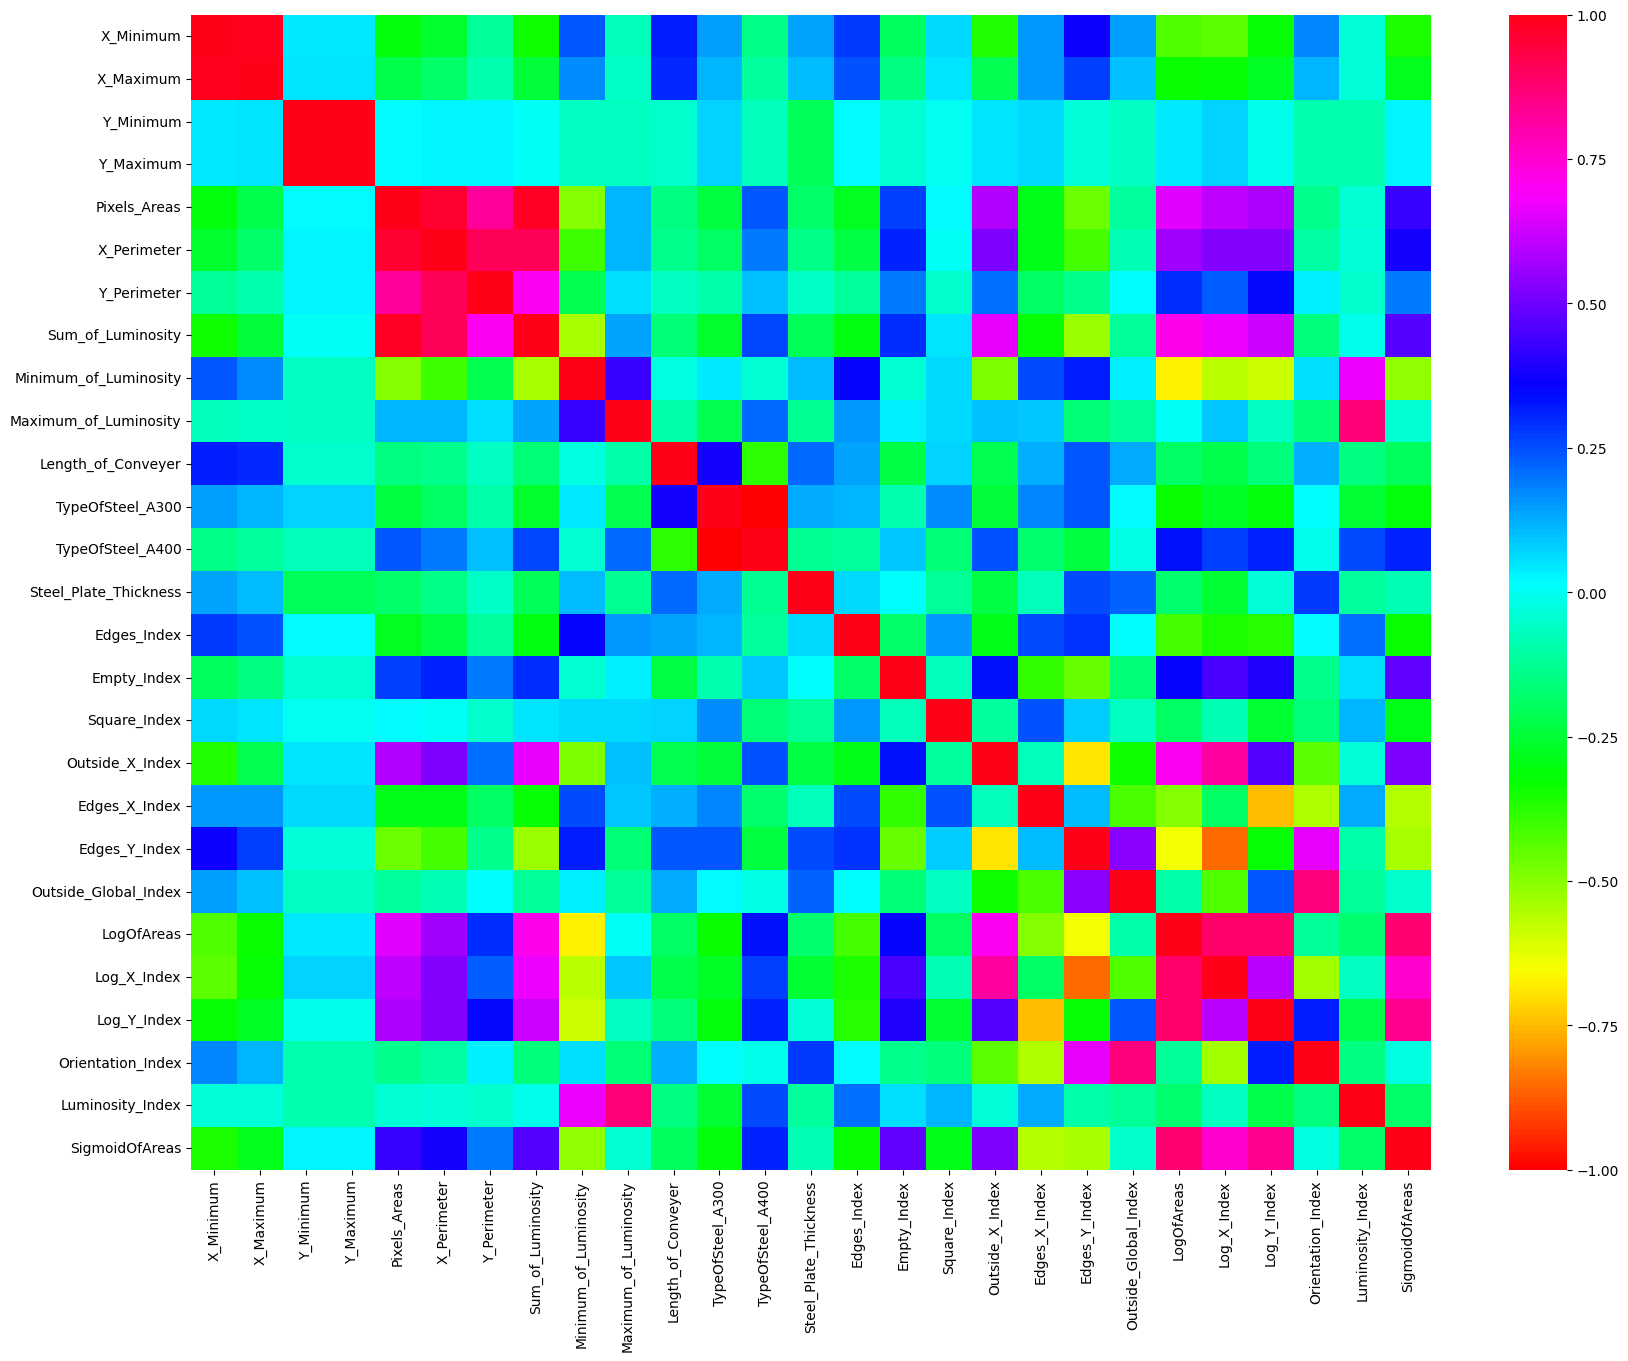

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap='hsv')

In [13]:
df['Target'] = pd.Categorical(df['Target'])
df['Target_Code'] = df.Target.cat.codes

In [14]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target,Target_Code
0,42,50,270900,270944,267,17,44,24220,76,108,...,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry,4
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry,4
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry,4
3,853,860,369370,369415,176,13,45,18996,99,126,...,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry,4
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry,4


In [15]:
y=df.iloc[:,27];
y.head()

0    Pastry
1    Pastry
2    Pastry
3    Pastry
4    Pastry
Name: Target, dtype: category
Categories (7, object): ['Bumps', 'Dirtiness', 'K_Scatch', 'Other_Faults', 'Pastry', 'Stains',
                         'Z_Scratch']

<Axes: xlabel='Target', ylabel='X_Maximum'>

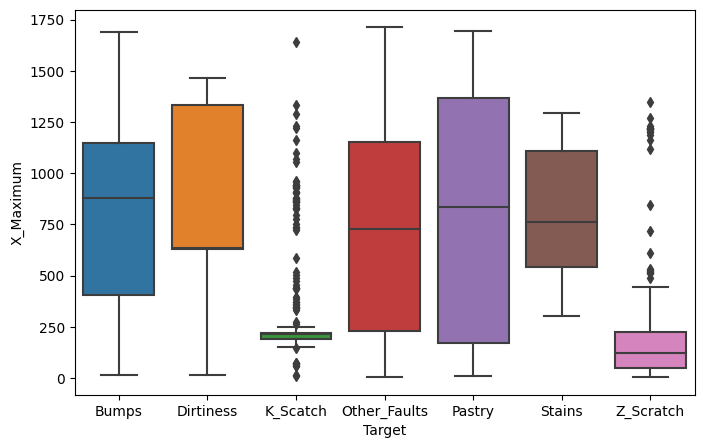

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Target', y='X_Maximum', data=df)

In [17]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target_Code
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251,-0.155906
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736,-0.179694
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257,-0.139695
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284,-0.139694
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947,-0.076184
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605,-0.056565
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772,-0.018765
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248,-0.086180
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797,0.086158
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651,-0.099244


In [18]:
from sklearn.cluster import DBSCAN
from collections import Counter
eps_r = 0.1
while eps_r < 10:
    dbscan_model = DBSCAN(eps=eps_r, min_samples=7).fit(X_std) 
    
    if Counter(dbscan_model.labels_)[-1] < 0.1*len(X_std):
        print('The neighbourhood distance considered for removal of less than 10% outliers is: {}'.format(eps_r))
        break
        
    eps_r = eps_r + 0.1

The neighbourhood distance considered for removal of less than 10% outliers is: 0.6


In [19]:
dbscan_model = DBSCAN(eps=eps_r, min_samples=7).fit(X_std)

In [20]:
outliers = X_std[dbscan_model.labels_ == -1]
outliers.shape

(144, 27)

In [21]:
X_std.drop(outliers.index, axis=0, inplace=True)
y.drop(outliers.index, axis=0, inplace=True)

In [22]:
X_std.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,0.024633,0.026916,0.020352,0.020354,0.001736,0.001436,0.002369,0.002068,0.374384,0.328704,...,0.003660,0.462865,1.000000,1.0,0.435312,0.217122,0.385916,0.912493,0.431200,0.525766
1,0.378299,0.378584,0.195006,0.195007,0.000694,0.000766,0.001598,0.000962,0.413793,0.398148,...,0.002402,0.594156,0.965006,1.0,0.354804,0.172082,0.343391,0.899834,0.501706,0.203632
2,0.486217,0.486249,0.119190,0.119190,0.000452,0.000574,0.000992,0.000666,0.487685,0.407407,...,0.002516,0.746347,0.944725,1.0,0.317509,0.172082,0.294761,0.836082,0.533882,0.108967
3,0.500293,0.500878,0.027938,0.027940,0.001140,0.001053,0.002424,0.001617,0.487685,0.412037,...,0.004231,0.531757,1.000000,1.0,0.398243,0.196206,0.388194,0.925707,0.513163,0.456527
4,0.756012,0.761849,0.037853,0.037872,0.015768,0.005552,0.014269,0.021282,0.182266,0.412037,...,0.012694,0.272829,0.987915,1.0,0.630962,0.335184,0.565877,0.970797,0.487325,1.000000


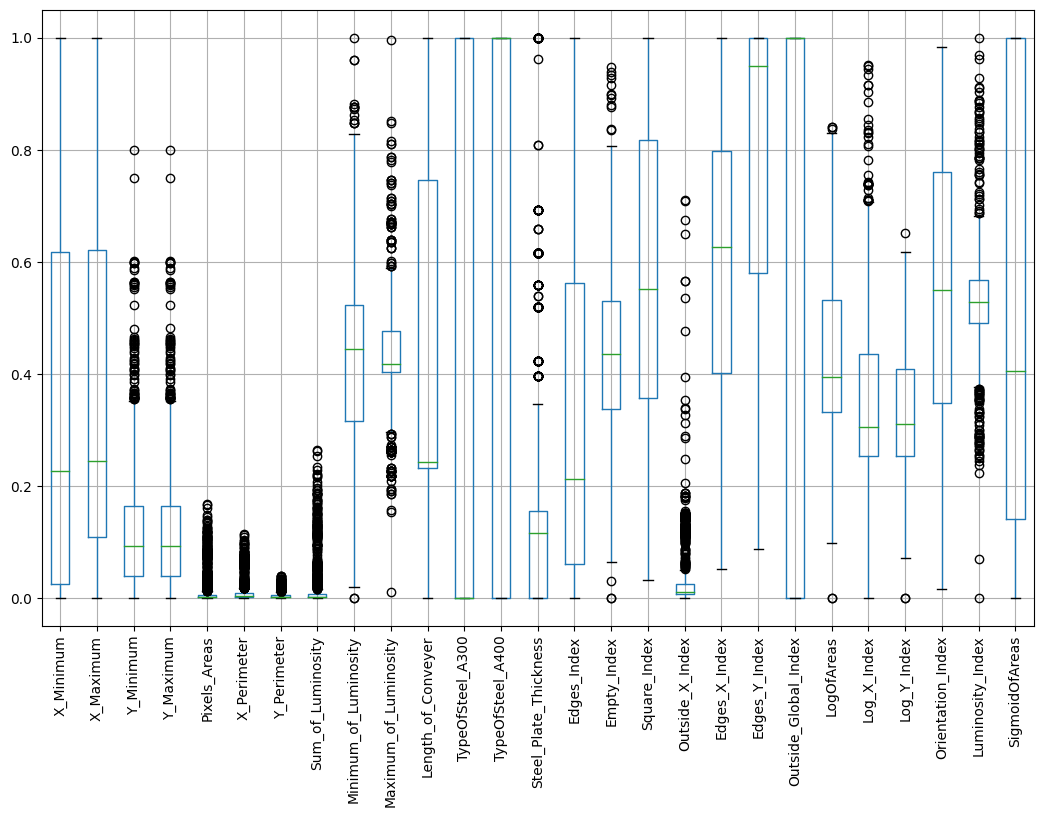

In [23]:
X_std.boxplot(figsize = (12.8,8), rot = 90)
plt.boxplot
plt.show()

In [24]:
X_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797 entries, 0 to 1940
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1797 non-null   float64
 1   X_Maximum              1797 non-null   float64
 2   Y_Minimum              1797 non-null   float64
 3   Y_Maximum              1797 non-null   float64
 4   Pixels_Areas           1797 non-null   float64
 5   X_Perimeter            1797 non-null   float64
 6   Y_Perimeter            1797 non-null   float64
 7   Sum_of_Luminosity      1797 non-null   float64
 8   Minimum_of_Luminosity  1797 non-null   float64
 9   Maximum_of_Luminosity  1797 non-null   float64
 10  Length_of_Conveyer     1797 non-null   float64
 11  TypeOfSteel_A300       1797 non-null   float64
 12  TypeOfSteel_A400       1797 non-null   float64
 13  Steel_Plate_Thickness  1797 non-null   float64
 14  Edges_Index            1797 non-null   float64
 15  Empt

In [25]:
y


0             Pastry
1             Pastry
2             Pastry
3             Pastry
4             Pastry
            ...     
1936    Other_Faults
1937    Other_Faults
1938    Other_Faults
1939    Other_Faults
1940    Other_Faults
Name: Target, Length: 1797, dtype: category
Categories (7, object): ['Bumps', 'Dirtiness', 'K_Scatch', 'Other_Faults', 'Pastry', 'Stains',
                         'Z_Scratch']

# Machine Learning algorithm

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size = 0.90, random_state = 15)

# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=30, random_state=68, max_depth = 10)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)
print('The training accuracy of the model is {}'.format(accuracy_score(y_train,y_pred_train)))
print('The testing accuracy of the model is {}'.format(accuracy_score(y_test,y_pred_rfc)))

The training accuracy of the model is 0.943104514533086
The testing accuracy of the model is 0.7944444444444444


[[31  0  0 12  1  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0 40  0  0  0  0]
 [ 9  0  0 38  0  0  0]
 [ 2  0  0  3  6  0  1]
 [ 1  0  0  1  0 11  0]
 [ 2  0  0  5  0  0 14]]


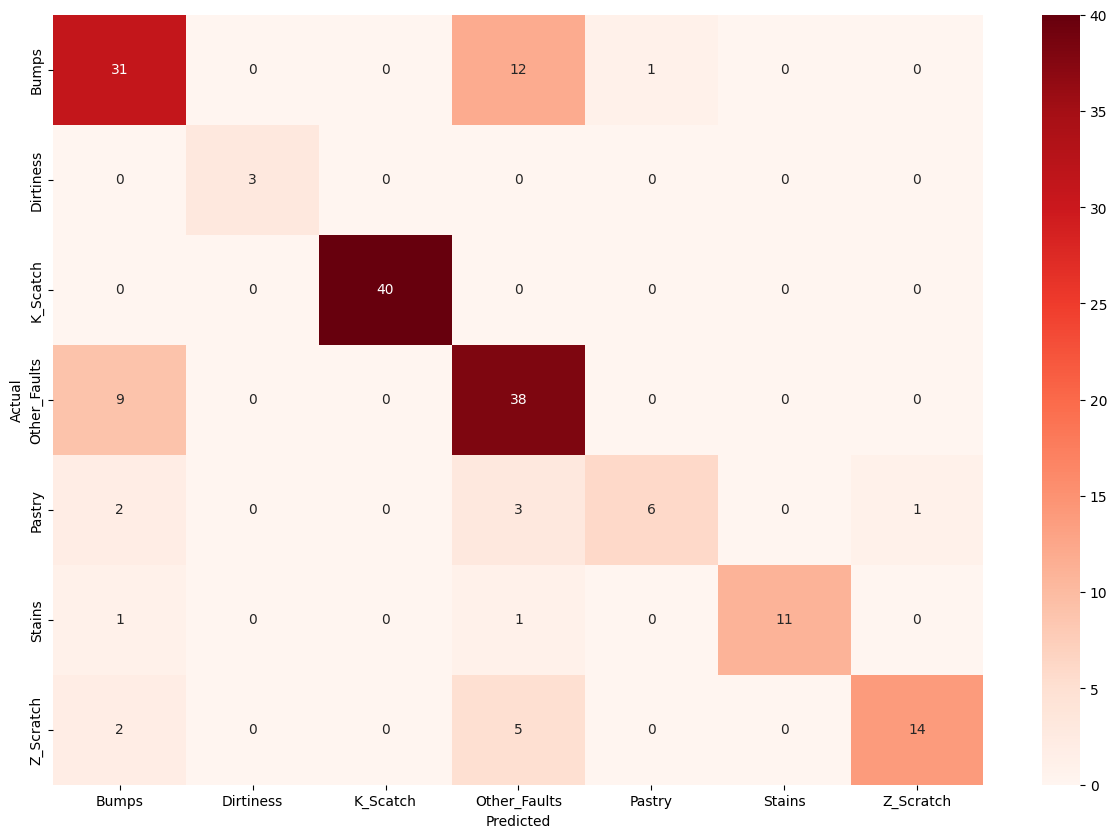

In [37]:
#Plotting the confusion matrix.

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rfc)

print(cm)
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sns.heatmap(df_cm,annot=True,cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.72      0.66      0.69        44
   Dirtiness       1.00      0.67      0.80         3
    K_Scatch       1.00      1.00      1.00        40
Other_Faults       0.71      0.72      0.72        47
      Pastry       0.53      0.67      0.59        12
      Stains       1.00      0.85      0.92        13
   Z_Scratch       0.83      0.95      0.89        21

    accuracy                           0.80       180
   macro avg       0.83      0.79      0.80       180
weighted avg       0.81      0.80      0.80       180



# KNN

In [39]:
kn=KNeighborsClassifier(n_neighbors=6)
kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)

In [40]:
kntr=kn.score(X_train,y_train)
knt=kn.score(X_test,y_test)

In [41]:
print('The training accuracy of the model is ', kntr)
print('The testing accuracy of the model is ', knt)

The training accuracy of the model is  0.7903525046382189
The testing accuracy of the model is  0.7277777777777777


In [42]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[31  0  1  8  1  0  3]
 [ 0  3  0  0  0  0  0]
 [ 0  0 40  0  0  0  0]
 [15  2  0 28  0  0  2]
 [ 3  0  0  4  4  0  1]
 [ 1  0  0  1  0 11  0]
 [ 4  0  0  3  0  0 14]]


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.57      0.70      0.63        44
   Dirtiness       0.60      1.00      0.75         3
    K_Scatch       0.98      1.00      0.99        40
Other_Faults       0.64      0.60      0.62        47
      Pastry       0.80      0.33      0.47        12
      Stains       1.00      0.85      0.92        13
   Z_Scratch       0.70      0.67      0.68        21

    accuracy                           0.73       180
   macro avg       0.76      0.74      0.72       180
weighted avg       0.74      0.73      0.72       180



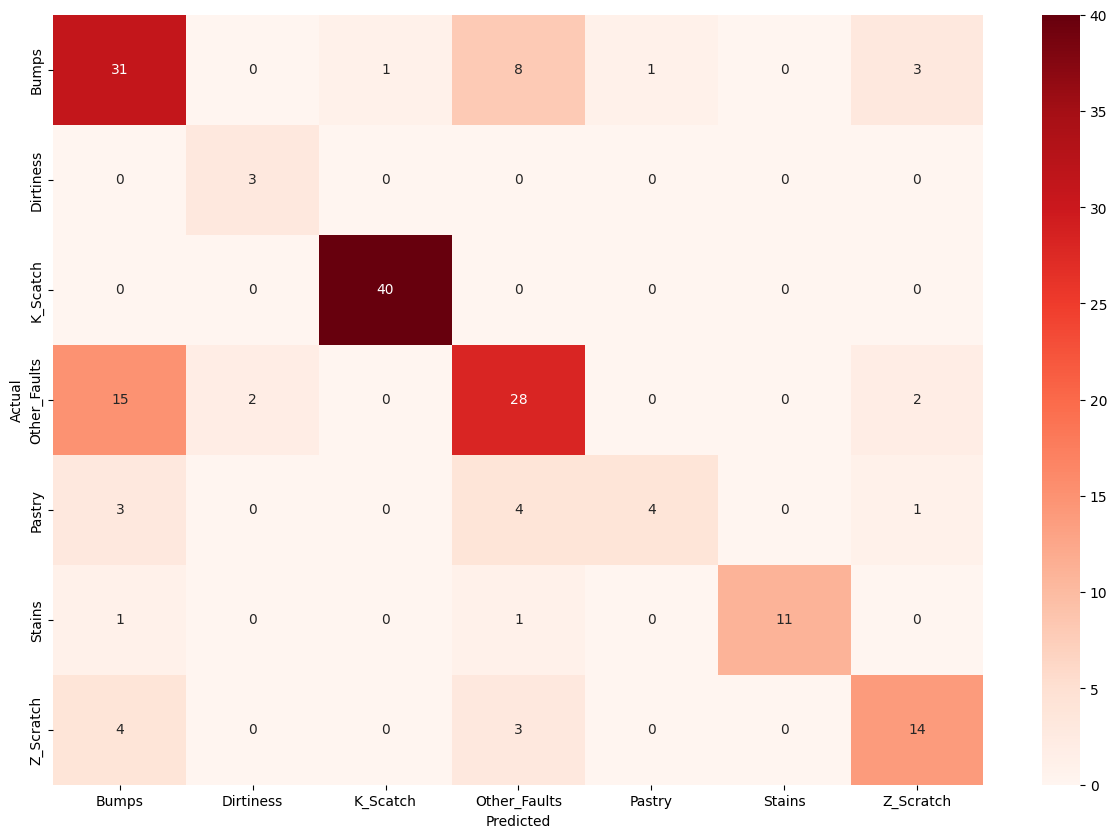

In [44]:
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sns.heatmap(df_cm,annot=True,cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
DC=DecisionTreeClassifier()
DC.fit(X_train,y_train)
y_pred = DC.predict(X_test)


In [46]:
Dcr=DC.score(X_train,y_train)
Dc=DC.score(X_test,y_test)
print('The training accuracy of the model is ', Dcr)
print('The testing accuracy of the model is ', Dc)

The training accuracy of the model is  1.0
The testing accuracy of the model is  0.7555555555555555


In [47]:
dm = confusion_matrix(y_test, y_pred)
print(dm)

[[25  0  0 13  2  1  3]
 [ 0  2  0  0  1  0  0]
 [ 0  0 40  0  0  0  0]
 [10  0  0 32  2  1  2]
 [ 1  0  0  5  6  0  0]
 [ 1  1  0  0  0 11  0]
 [ 0  0  0  1  0  0 20]]


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.68      0.57      0.62        44
   Dirtiness       0.67      0.67      0.67         3
    K_Scatch       1.00      1.00      1.00        40
Other_Faults       0.63      0.68      0.65        47
      Pastry       0.55      0.50      0.52        12
      Stains       0.85      0.85      0.85        13
   Z_Scratch       0.80      0.95      0.87        21

    accuracy                           0.76       180
   macro avg       0.74      0.74      0.74       180
weighted avg       0.75      0.76      0.75       180



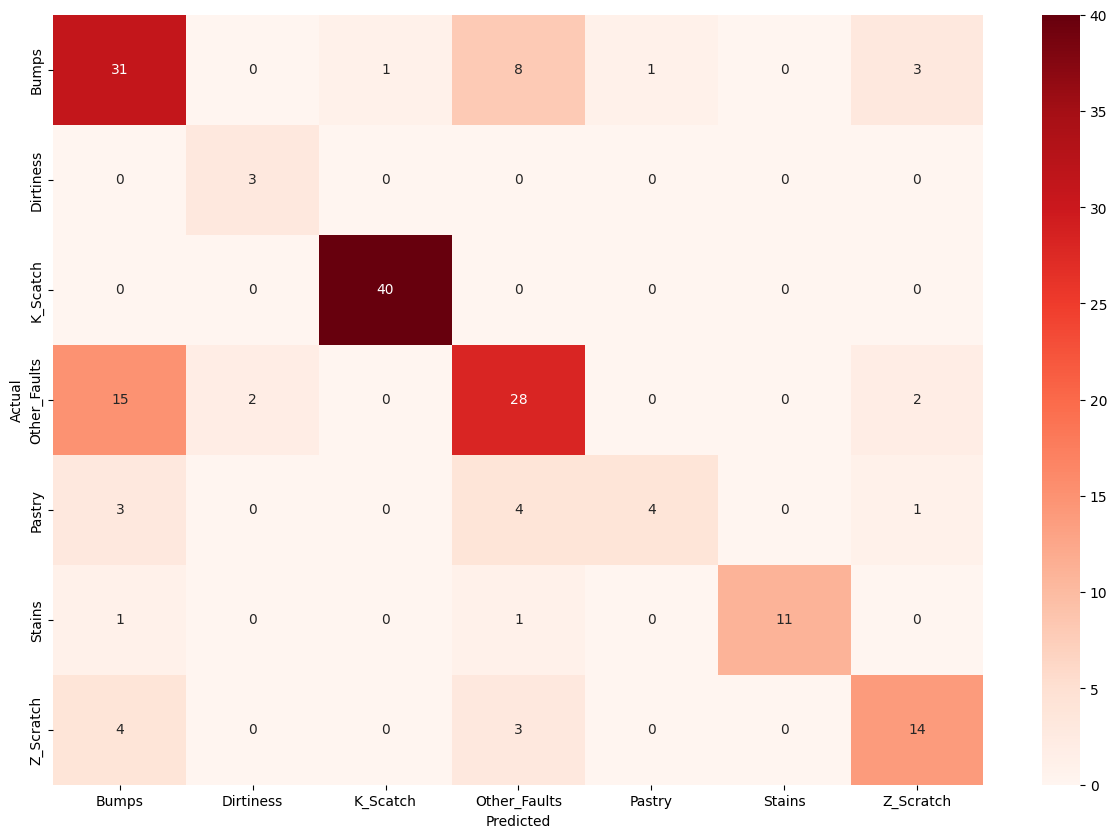

In [49]:
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sns.heatmap(df_cm,annot=True,cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SVC

In [50]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)

In [51]:
sm=SVM.score(X_train,y_train)
sms=SVM.score(X_test,y_test)
print('The training accuracy of the model is ', sm)
print('The testing accuracy of the model is ', sms)

The training accuracy of the model is  0.7402597402597403
The testing accuracy of the model is  0.7055555555555556


In [52]:
ss = confusion_matrix(y_test, y_pred)
print(ss)

[[24  0  0 16  1  0  3]
 [ 0  1  0  2  0  0  0]
 [ 0  0 40  0  0  0  0]
 [12  0  0 34  0  0  1]
 [ 4  0  0  3  4  0  1]
 [ 1  0  0  2  0 10  0]
 [ 3  0  0  4  0  0 14]]


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.55      0.55      0.55        44
   Dirtiness       1.00      0.33      0.50         3
    K_Scatch       1.00      1.00      1.00        40
Other_Faults       0.56      0.72      0.63        47
      Pastry       0.80      0.33      0.47        12
      Stains       1.00      0.77      0.87        13
   Z_Scratch       0.74      0.67      0.70        21

    accuracy                           0.71       180
   macro avg       0.81      0.62      0.67       180
weighted avg       0.73      0.71      0.70       180



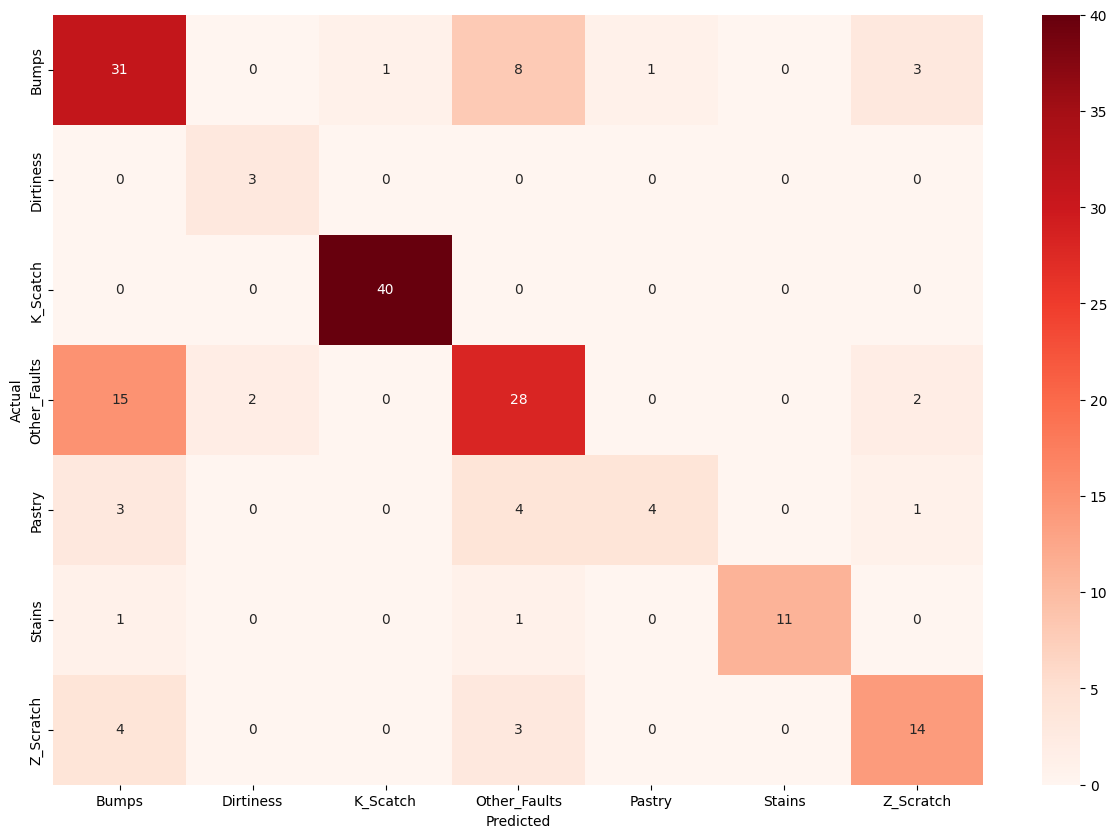

In [54]:
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sns.heatmap(df_cm,annot=True,cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()